#### Answers submitted by:  Will Hetfield  
#### Date:  January 4, 2017 
---

# Python Part 3:  Pandas Exercises
---

## Q1:  Read in the libraries you need

In [27]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [28]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Q2:  Set options in pandas so it displays `max_rows` to 30

In [75]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.set_option('display.precision', 3)

## Q3:  What versions of `Python` and `pandas` are you running?  



In [30]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.20.3
Numpy version: 1.13.3


In [31]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 3.6.3 |Anaconda, Inc.| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## Q4:  Read in the "olive" dataset that is available in this folder
Description:  572 olive oil samples from 3 different regions (and 9 sub-regions) of Italy; for each sample the normalized concentrations of 8 fatty acids are given.  
Source:  http://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/

There are 3 regions: 
* South
* North
* Sardinia

There are 9 sub-regions (areas): 
* North Apulia
* South Apulia
* Calabria
* Sicily
* Inland
* Coastal Sardinia
* Umbria
* East
* West Liguria

Supplemental report:  http://www.public.iastate.edu/~dicook/stat503/05/cs-olive.pdf

In [32]:
# read csv data into pandas dataframe
df = pd.read_csv('olive.csv')

## Q5:  How many rows and columns are in this dataframe?

In [33]:
df.shape

(572, 11)

## Q6 (HackerRank) assign the first 2 rows of `df` to `df_first_2`

In [34]:

df_first_2 = df.iloc[ : , 0:2]

## Q6:  Print the first 4 rows of the data

In [35]:
print(df.head(4))

       Unnamed: 0  region  area  palmitic  palmitoleic  stearic  oleic  \
0  1.North-Apulia       1     1      1075           75      226   7823   
1  2.North-Apulia       1     1      1088           73      224   7709   
2  3.North-Apulia       1     1       911           54      246   8113   
3  4.North-Apulia       1     1       966           57      240   7952   

   linoleic  linolenic  arachidic  eicosenoic  
0       672         36         60          29  
1       781         31         61          29  
2       549         31         63          29  
3       619         50         78          35  


## Q7:  How many different data types are in this dataframe, and what are the data types?

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 11 columns):
Unnamed: 0     572 non-null object
region         572 non-null int64
area           572 non-null int64
palmitic       572 non-null int64
palmitoleic    572 non-null int64
stearic        572 non-null int64
oleic          572 non-null int64
linoleic       572 non-null int64
linolenic      572 non-null int64
arachidic      572 non-null int64
eicosenoic     572 non-null int64
dtypes: int64(10), object(1)
memory usage: 49.2+ KB


## Q8:  Create a new column
### Copy the column to:  'Unnamed: 0' to 'sub_region_raw'

In [37]:
df['sub_region_raw'] = df['Unnamed: 0']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 12 columns):
Unnamed: 0        572 non-null object
region            572 non-null int64
area              572 non-null int64
palmitic          572 non-null int64
palmitoleic       572 non-null int64
stearic           572 non-null int64
oleic             572 non-null int64
linoleic          572 non-null int64
linolenic         572 non-null int64
arachidic         572 non-null int64
eicosenoic        572 non-null int64
sub_region_raw    572 non-null object
dtypes: int64(10), object(2)
memory usage: 53.7+ KB


## Q9:  Rename a column
### 'Unnamed: 0' to:  'sub_region_desc'

In [43]:

df.rename(columns = {'Unnamed: 0' : 'sub_region_desc'},inplace = True)
df['sub_region_desc']

0        1.North-Apulia
1        2.North-Apulia
2        3.North-Apulia
3        4.North-Apulia
4        5.North-Apulia
             ...       
567    568.West-Liguria
568    569.West-Liguria
569    570.West-Liguria
570    571.West-Liguria
571    572.West-Liguria
Name: sub_region_desc, Length: 572, dtype: object

## Q10:  Rename the column 'area' to:  'sub_region'

In [45]:
 df.rename(columns = {'area' : 'sub_region'},inplace = True)
df['sub_region']

0      1
1      1
2      1
3      1
4      1
      ..
567    8
568    8
569    8
570    8
571    8
Name: sub_region, Length: 572, dtype: int64

## Q11:  How many unique values of 'region' are there?

Hint:  the answer should be 3

In [54]:
df.region.value_counts()

1    323
3    151
2     98
Name: region, dtype: int64

In [55]:
df['region'].value_counts().to_dict()

{1: 323, 2: 98, 3: 151}

## Q12:  How many unique values of 'sub_region' are there?

Hint:  the answer should be 9

In [56]:
df['sub_region'].value_counts().to_dict()

{1: 25, 2: 56, 3: 206, 4: 36, 5: 65, 6: 33, 7: 50, 8: 50, 9: 51}

## Q13:  How many unique values of 'sub_region_desc' are there?
Hint:  we would like the answer to be 9, but here's where we run into some messy data

In [57]:
df['sub_region_desc'].value_counts().to_dict()

{'1.North-Apulia': 1,
 '10.North-Apulia': 1,
 '100.South-Apulia': 1,
 '101.South-Apulia': 1,
 '102.South-Apulia': 1,
 '103.South-Apulia': 1,
 '104.South-Apulia': 1,
 '105.South-Apulia': 1,
 '106.South-Apulia': 1,
 '107.South-Apulia': 1,
 '108.South-Apulia': 1,
 '109.South-Apulia': 1,
 '11.North-Apulia': 1,
 '110.South-Apulia': 1,
 '111.South-Apulia': 1,
 '112.South-Apulia': 1,
 '113.South-Apulia': 1,
 '114.South-Apulia': 1,
 '115.South-Apulia': 1,
 '116.South-Apulia': 1,
 '117.South-Apulia': 1,
 '118.South-Apulia': 1,
 '119.South-Apulia': 1,
 '12.North-Apulia': 1,
 '120.South-Apulia': 1,
 '121.South-Apulia': 1,
 '122.South-Apulia': 1,
 '123.South-Apulia': 1,
 '124.South-Apulia': 1,
 '125.South-Apulia': 1,
 '126.South-Apulia': 1,
 '127.South-Apulia': 1,
 '128.South-Apulia': 1,
 '129.South-Apulia': 1,
 '13.North-Apulia': 1,
 '130.South-Apulia': 1,
 '131.South-Apulia': 1,
 '132.South-Apulia': 1,
 '133.South-Apulia': 1,
 '134.South-Apulia': 1,
 '135.South-Apulia': 1,
 '136.South-Apulia': 1

## Q14:  Looks like 'sub_region_desc' has line numbers attached to the beginning of region name.  We need to do some data cleaning.  Can you remove them?  
```
 	region 	sub_region 	palmitic 	palmitoleic 	stearic 	oleic 	linoleic 	linolenic 	arachidic 	eicosenoic 	sub_region_raw
sub_region_desc 											
1.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
10.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
100.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
101.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
102.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
```

Hint:  check out this link
http://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string
 

In [70]:
#df['sub_region_desc'].str.extract(r'.*?([-A-Za-z]+).*?', expand = False)
df['sub_region_desc'].str.extract(r'([-A-Za-z]+)', expand = False)

0      North-Apulia
1      North-Apulia
2      North-Apulia
3      North-Apulia
4      North-Apulia
           ...     
567    West-Liguria
568    West-Liguria
569    West-Liguria
570    West-Liguria
571    West-Liguria
Name: sub_region_desc, Length: 572, dtype: object

In [72]:
df['sub_region_desc'] = df['sub_region_desc'].str.extract(r'([-A-Za-z]+)', expand = False)

## Q15:  Try again:  How many unique values of 'sub_region_desc' are there?
Hint:  you should see 9 of them!

In [73]:
df['sub_region_desc'].value_counts().to_dict()

{'Calabria': 56,
 'Coast-Sardinia': 33,
 'East-Liguria': 50,
 'Inland-Sardinia': 65,
 'North-Apulia': 25,
 'Sicily': 36,
 'South-Apulia': 206,
 'Umbria': 51,
 'West-Liguria': 50}

## Q16:   Create a horizontal frequency barplot for 'region'

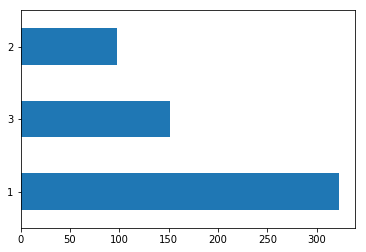

In [76]:
 df['region'].value_counts().plot('barh')

## Q17:   Create a horizontal frequency barplot for 'sub_region'

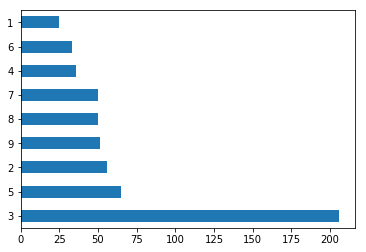

In [77]:
 df['sub_region'].value_counts().plot('barh')

## Q18:   Create a horizontal frequency barplot for 'sub_region_desc'

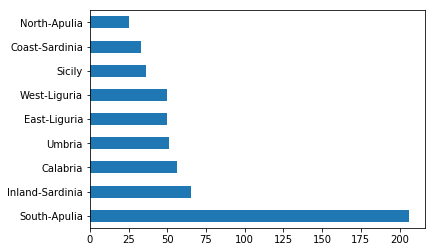

In [78]:
 df['sub_region_desc'].value_counts().plot('barh')